In [204]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# PWM 20% da velocidade máxima

In [205]:
file_path = '/content/degmotor20closed.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-205-e07ecbb2b18b>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [206]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [208]:
pwm20closed_data = {}

N = 30 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm20closed_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm20closed_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm20closed_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm20closed_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm20closed_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm20closed_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm20closed_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm20closed_data['overshoot'] = (data_frame2['Velocity'].max()-pwm20closed_data['median'])/pwm20closed_data['median']*100

# obtendo o ganho DC
pwm20closed_data['DC gain'] = pwm20closed_data['median']/data_frame1['Setpoint'][0]

# com o overshoot achamos ç, e com o tempo de assentamento achamos wn

ç = np.sqrt(np.square(np.log(pwm20closed_data['overshoot']/100))/(np.square(np.pi)+np.square(np.log(pwm20closed_data['overshoot']/100))))
wn = 4/(pwm20closed_data['settling time']*ç)
wd = wn*np.sqrt(1-ç**2)

pwm20closed_data['rise time'] = (np.pi-np.arctan(wd/(ç*wn)))/wd

pwm20closed_data['steady state error'] = 100*1/20*1/N*sum(data_frame1['Setpoint'].tail(N))

In [209]:
print(ç)
print(wn)
print(wd)

0.6965841523292395
6.380341024961739
4.577735813156623


In [210]:
pwm20closed_data

{'median': 13.261999999999995,
 'response_constant': 1.3,
 'time_constant': 0.5,
 'settling time': 0.9,
 'overshoot': 4.73533403709852,
 'DC gain': 0.6095229340932069,
 'rise time': 0.5114803295528618,
 'steady state error': 35.849000000000004}

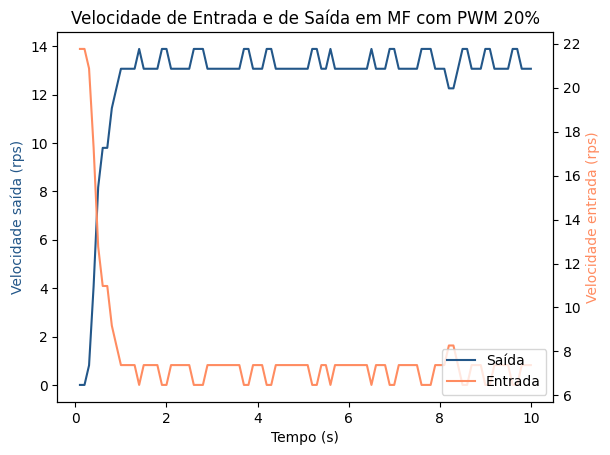

In [211]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f20closed = data_frame1['Setpoint']
g20closed = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g20closed, linestyle='-',color='#235789', label='Saída')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade saída (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f20closed, linestyle='-',color='#FF8C61', label='Entrada')
ax2.set_ylabel('Velocidade entrada (rps)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Velocidade de Entrada e de Saída em MF com PWM 20%')
plt.show()

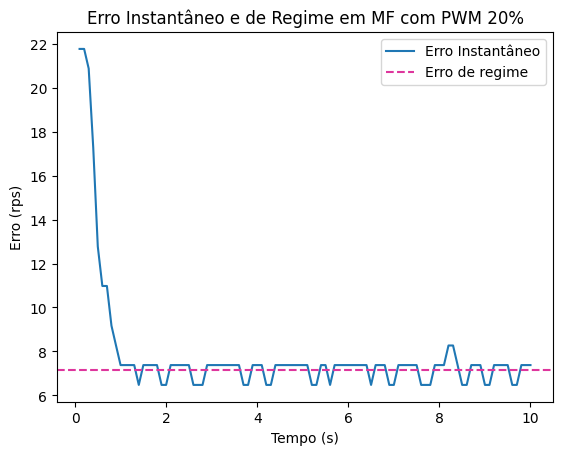

In [212]:
N = 30
x = data_frame['Time']

plt.plot(x, data_frame1['Setpoint'], label='Erro Instantâneo')
plt.axhline(1/N*sum(data_frame1['Setpoint'].tail(N)), label='Erro de regime', linestyle='--', color='#DE369D')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro (rps)')
plt.title('Erro Instantâneo e de Regime em MF com PWM 20%')
plt.legend()
plt.show()

# PWM 30% da velocidade máxima

In [213]:
file_path = '/content/degmotor30closed.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-213-a0dedb0a8b92>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [214]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [215]:
pwm30closed_data = {}

N = 30 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm30closed_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm30closed_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm30closed_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm30closed_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm30closed_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm30closed_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm30closed_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm30closed_data['overshoot'] = (data_frame2['Velocity'].max()-pwm30closed_data['median'])/pwm30closed_data['median']*100

# obtendo o ganho DC
pwm30closed_data['DC gain'] = pwm30closed_data['median']/data_frame1['Setpoint'][0]

# com o overshoot achamos ç, e com o tempo de assentamento achamos wn

ç = np.sqrt(np.square(np.log(pwm30closed_data['overshoot']/100))/(np.square(np.pi)+np.square(np.log(pwm30closed_data['overshoot']/100))))
wn = 4/(pwm30closed_data['settling time']*ç)
wd = wn*np.sqrt(1-ç**2)

pwm30closed_data['rise time'] = (np.pi-np.arctan(wd/(ç*wn)))/wd

pwm30closed_data['steady state error'] = 100*1/30*1/N*sum(data_frame1['Setpoint'].tail(N))

In [216]:
print(ç)
print(wn)
print(wd)

0.743777275940666
5.377954031925944
3.5947725337646212


In [217]:
pwm30closed_data

{'median': 19.82866666666667,
 'response_constant': 1.0,
 'time_constant': 0.5,
 'settling time': 1.0,
 'overshoot': 3.0326463369532117,
 'DC gain': 0.6075517561867412,
 'rise time': 0.6702788630610416,
 'steady state error': 36.08488888888888}

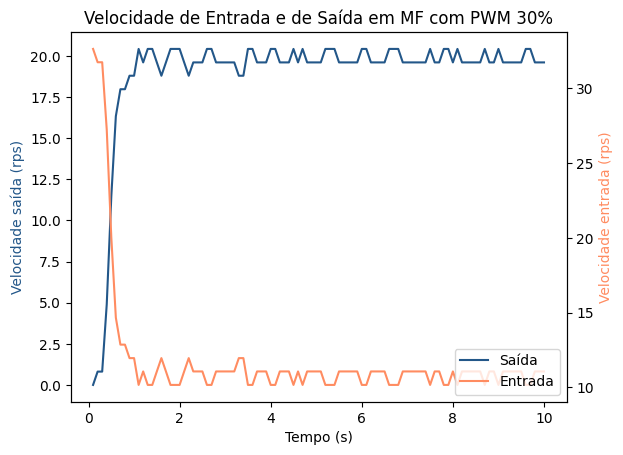

In [218]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f30closed = data_frame1['Setpoint']
g30closed = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g30closed, linestyle='-',color='#235789', label='Saída')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade saída (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f30closed, linestyle='-',color='#FF8C61', label='Entrada')
ax2.set_ylabel('Velocidade entrada (rps)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Velocidade de Entrada e de Saída em MF com PWM 30%')
plt.show()

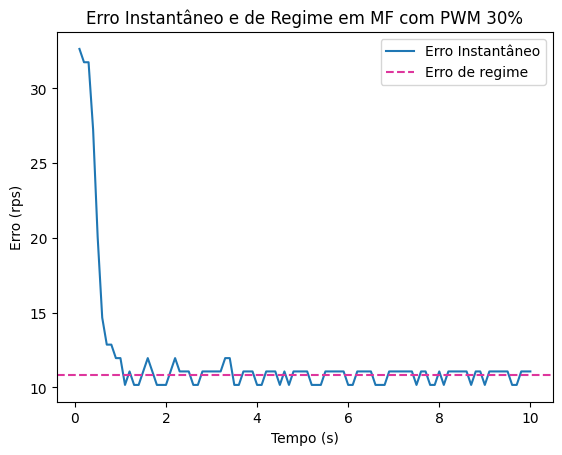

In [219]:
N = 30
x = data_frame['Time']

plt.plot(x, data_frame1['Setpoint'], label='Erro Instantâneo')
plt.axhline(1/N*sum(data_frame1['Setpoint'].tail(N)), label='Erro de regime', linestyle='--', color='#DE369D')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro (rps)')
plt.title('Erro Instantâneo e de Regime em MF com PWM 30%')
plt.legend()
plt.show()

# PWM 60% da velocidade máxima

In [220]:
file_path = '/content/degmotor60closed.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-220-da8b202a53e1>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [221]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [222]:
pwm60closed_data = {}

N = 30 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm60closed_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm60closed_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm60closed_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm60closed_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm60closed_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm60closed_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm60closed_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm60closed_data['overshoot'] = (data_frame2['Velocity'].max()-pwm60closed_data['median'])/pwm60closed_data['median']*100

# obtendo o ganho DC
pwm60closed_data['DC gain'] = pwm60closed_data['median']/data_frame1['Setpoint'][0]

# com o overshoot achamos ç, e com o tempo de assentamento achamos wn

ç = np.sqrt(np.square(np.log(pwm60closed_data['overshoot']/100))/(np.square(np.pi)+np.square(np.log(pwm60closed_data['overshoot']/100))))
wn = 4/(pwm60closed_data['settling time']*ç)
wd = wn*np.sqrt(1-ç**2)

pwm60closed_data['rise time'] = (np.pi-np.arctan(wd/(ç*wn)))/wd

pwm60closed_data['steady state error'] = 100*1/60*1/N*sum(data_frame1['Setpoint'].tail(N))

In [223]:
print(ç)
print(wn)
print(wd)

0.6613298712534522
6.048418760245316
4.5368898487055525


In [224]:
pwm60closed_data

{'median': 36.91633333333333,
 'response_constant': 1.0,
 'time_constant': 0.5,
 'settling time': 1.0,
 'overshoot': 6.267325212868749,
 'DC gain': 0.5655595387647965,
 'rise time': 0.505497536463316,
 'steady state error': 41.11005555555556}

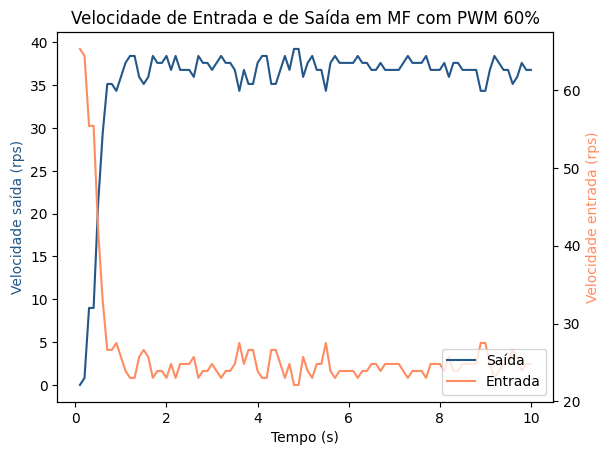

In [225]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f60closed = data_frame1['Setpoint']
g60closed = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g60closed, linestyle='-',color='#235789', label='Saída')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade saída (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f60closed, linestyle='-',color='#FF8C61', label='Entrada')
ax2.set_ylabel('Velocidade entrada (rps)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Velocidade de Entrada e de Saída em MF com PWM 60%')
plt.show()

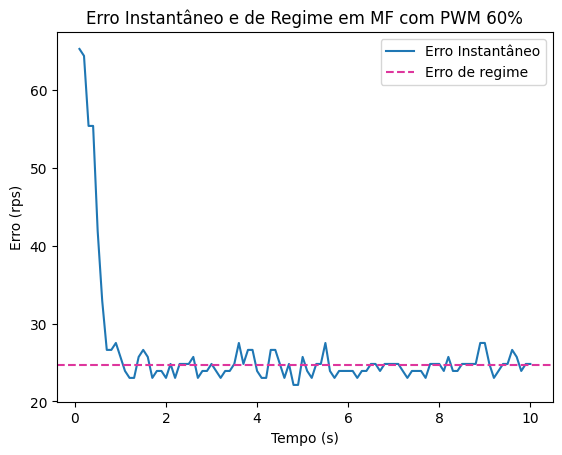

In [226]:
N = 30
x = data_frame['Time']

plt.plot(x, data_frame1['Setpoint'], label='Erro Instantâneo')
plt.axhline(1/N*sum(data_frame1['Setpoint'].tail(N)), label='Erro de regime', linestyle='--', color='#DE369D')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro (rps)')
plt.title('Erro Instantâneo e de Regime em MF com PWM 60%')
plt.legend()
plt.show()

# PWM 90% da velocidade máxima

In [227]:
file_path = '/content/degmotor90closed.dat'

# Read the .dat file into a pandas DataFrame
data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])

<ipython-input-227-ddd291bb435c>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_frame = pd.read_csv(file_path, delimiter='  ', header=None, names=['Time', 'Setpoint', 'Velocity'])


In [228]:
# Aqui vamos criar um data framework para cada conjunto:
# tempo x setpoint e tempo x velocidade
# A escolha se justifica pois em malha fechada ambos variam e
# dessa forma precisamos lidar com duas variáveis de forma separada
# (MATLAB consegue separar isso 'por trás dos panos')

data_frame1 = pd.DataFrame()
data_frame2 = pd.DataFrame()

data_frame1['Time'] = data_frame['Time']
data_frame1['Setpoint'] = data_frame['Setpoint']

data_frame2['Time'] = data_frame['Time']
data_frame2['Velocity'] = data_frame['Velocity']

In [235]:
pwm90closed_data = {}

N = 30 #numero de amostrar para computar a media
t_sampling = 0.1

#obtendo o valor medio
pwm90closed_data['median'] = 1/N*sum(data_frame2['Velocity'].tail(N))

#obtendo o instante de tempo onde atinge a velocidade final (media anterior) pela primeira vez
pwm90closed_data['response_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm90closed_data['median']).idxmax()

# obtendo a constante de tempo da planta
pwm90closed_data['time_constant'] = t_sampling*data_frame2['Velocity'].ge(pwm90closed_data['median']*0.639).idxmax()

#obtendo o tempo de assentamento no criterio de 2%
pwm90closed_data['settling time'] = t_sampling*data_frame2['Velocity'].ge(pwm90closed_data['median']*0.98).idxmax()

#otendo o overshoot em %
pwm90closed_data['overshoot'] = (data_frame2['Velocity'].max()-pwm90closed_data['median'])/pwm90closed_data['median']*100

# obtendo o ganho DC
pwm90closed_data['DC gain'] = pwm90closed_data['median']/data_frame1['Setpoint'][0]

# com o overshoot achamos ç, e com o tempo de assentamento achamos wn

ç = np.sqrt(np.square(np.log(pwm90closed_data['overshoot']/100))/(np.square(np.pi)+np.square(np.log(pwm90closed_data['overshoot']/100))))
wn = 4/(pwm90closed_data['settling time']*ç)
wd = wn*np.sqrt(1-ç**2)

pwm90closed_data['rise time'] = (np.pi-np.arctan(wd/(ç*wn)))/wd

pwm90closed_data['steady state error'] = 100*1/90*1/N*sum(data_frame1['Setpoint'].tail(N))

In [236]:
print(ç)
print(wn)
print(wd)

0.7185366612311482
9.278116241478799
6.452828569390964


In [237]:
pwm90closed_data

{'median': 50.34933333333334,
 'response_constant': 0.6000000000000001,
 'time_constant': 0.4,
 'settling time': 0.6000000000000001,
 'overshoot': 3.894126370425284,
 'DC gain': 0.5318196429772296,
 'rise time': 0.36766702912770055,
 'steady state error': 43.65492592592593}

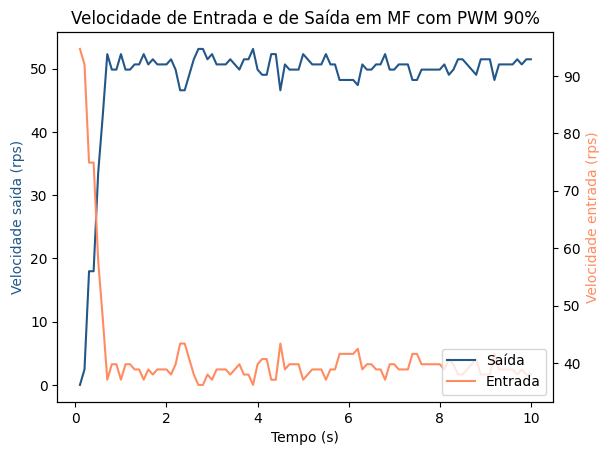

In [238]:
x = data_frame['Time'] #eh o mesmo tempo para todos
f90closed = data_frame1['Setpoint']
g90closed = data_frame2['Velocity']


fig, ax1 = plt.subplots()

# Plot the first function on the left Y-axis
ax1.plot(x, g90closed, linestyle='-',color='#235789', label='Saída')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Velocidade saída (rps)', color='#235789')

# Create the second Y-axis
ax2 = ax1.twinx()

# Plot the second function on the right Y-axis
ax2.plot(x, f90closed, linestyle='-',color='#FF8C61', label='Entrada')
ax2.set_ylabel('Velocidade entrada (rps)', color='#FF8C61')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.title('Velocidade de Entrada e de Saída em MF com PWM 90%')
plt.show()

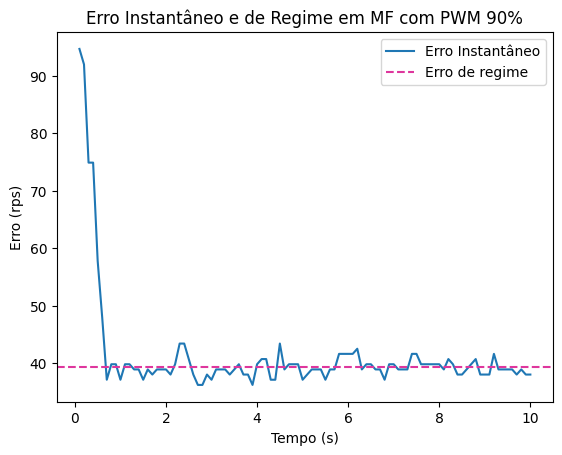

In [239]:
N = 30
x = data_frame['Time']

plt.plot(x, data_frame1['Setpoint'], label='Erro Instantâneo')
plt.axhline(1/N*sum(data_frame1['Setpoint'].tail(N)), label='Erro de regime', linestyle='--', color='#DE369D')
plt.xlabel('Tempo (s)')
plt.ylabel('Erro (rps)')
plt.title('Erro Instantâneo e de Regime em MF com PWM 90%')
plt.legend()
plt.show()

In [240]:
data_frame2['Velocity'].max()

53.13